<a href="https://colab.research.google.com/github/skywalker0803r/ruby_research/blob/main/crypto/BTCUSDT(%E8%B6%85%E7%B4%9A%E8%B6%A8%E5%8B%A2%E7%AD%96%E7%95%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 設定

In [182]:
!pip install finlab_crypto > log.txt
!pip install pandas-ta > log.txt

In [183]:
import finlab_crypto
finlab_crypto.setup()

# 載入歷史價格資料

In [184]:
from binance.client import Client

api_key = 'aJOD1H8jl0396wDSo0k4PnZftjGWHQEDLoCh4T2OhbgljMBoAi8PTMRIPhsxHpDh'
api_secret = 'VpdtNdN9j1ZnTu55NzmVGeffam0yZzoGAEs83gLct5y0WnEDH2y7C2Ptkkv0cuj0'
client = Client(api_key,api_secret)

ohlcv = finlab_crypto.crawler.get_nbars_binance('BTCUSDT','15m',10000,client)
ohlcv.tail()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,,
2021-01-19 04:00:00+00:00,1.611029e+12,36468.31,36610.42,36400.00,36594.86,636.339432,1.611030e+12,2.323326e+07,12506.0,334.877004,1.222800e+07,0.0
2021-01-19 04:15:00+00:00,1.611030e+12,36594.87,36648.92,36473.26,36531.53,375.997573,1.611031e+12,1.374259e+07,10233.0,202.192214,7.389580e+06,0.0
2021-01-19 04:30:00+00:00,1.611031e+12,36531.52,36585.00,36366.24,36516.80,516.240474,1.611031e+12,1.882988e+07,12849.0,204.285377,7.452044e+06,0.0
2021-01-19 04:45:00+00:00,1.611032e+12,36516.80,36525.96,36233.00,36284.71,701.116849,1.611032e+12,2.548979e+07,15642.0,269.059780,9.778830e+06,0.0
2021-01-19 05:00:00+00:00,1.611032e+12,36284.71,36404.21,36270.77,36327.90,300.150441,1.611033e+12,1.090771e+07,9794.0,127.591430,4.636731e+06,0.0


# 超級趨勢指標

In [185]:
from pandas_ta.overlap.supertrend import supertrend
supertrend(ohlcv['high'],ohlcv['low'],ohlcv['close'],length=3,multiplier=1)

,SUPERT_3_1.0,SUPERTd_3_1.0,SUPERTl_3_1.0,SUPERTs_3_1.0
timestamp,,,,
2020-10-06 00:00:00+00:00,0.000000,1,NaN,NaN
2020-10-06 00:15:00+00:00,10754.805000,1,10754.805,NaN
2020-10-06 00:30:00+00:00,10754.805000,1,10754.805,NaN
2020-10-06 00:45:00+00:00,10774.109077,-1,NaN,10774.109077
2020-10-06 01:00:00+00:00,10774.109077,-1,NaN,10774.109077
...,...,...,...,...
2021-01-19 04:00:00+00:00,36730.497120,-1,NaN,36730.497120
2021-01-19 04:15:00+00:00,36730.497120,-1,NaN,36730.497120
2021-01-19 04:30:00+00:00,36687.703164,-1,NaN,36687.703164


# 定義策略

In [187]:
@finlab_crypto.Strategy(f=1,n=3)
def super_strategy(ohlcv):
  f = super_strategy.f
  n = super_strategy.n
  close = ohlcv['close']
  SuperTrend = supertrend(ohlcv['high'],ohlcv['low'],ohlcv['close'],length=n,multiplier=f)['SUPERT_{}_{}.0'.format(n,f)]
  figures = {'overlaps': {'SuperTrend':SuperTrend}}
  buy = (close > SuperTrend) & (close.shift() < SuperTrend.shift()) 
  sell = (close < SuperTrend) & (close.shift() > SuperTrend.shift())
  return buy ,sell ,figures

# 回測

In [188]:
portfolio = super_strategy.backtest(ohlcv.tail(1000),freq='15m', plot=True)

# 優化

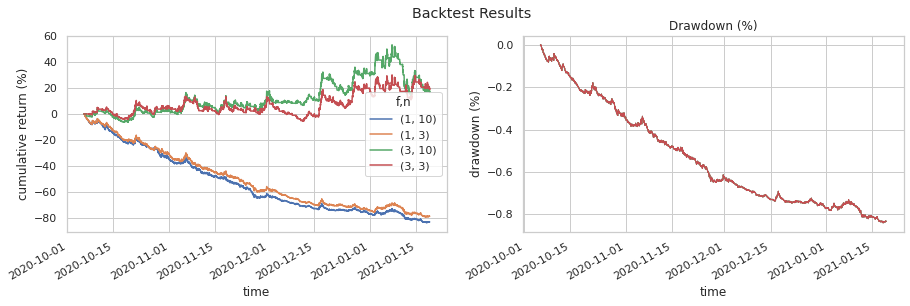

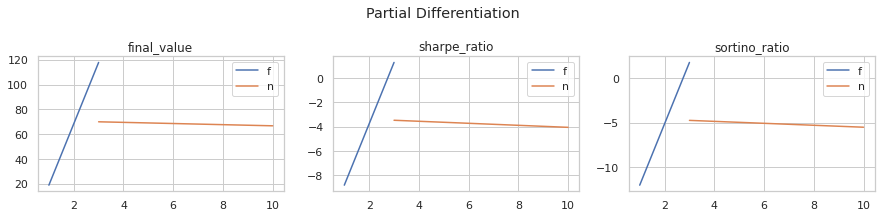

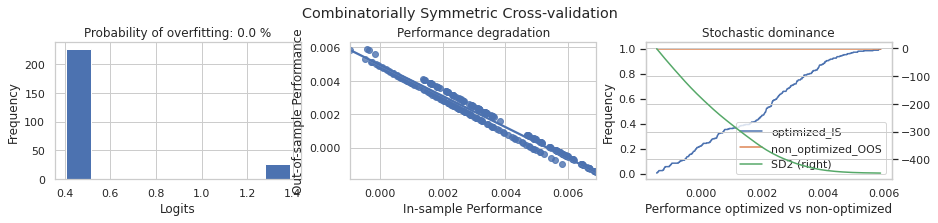

Output()

In [193]:
import numpy as np

vars = {
  'f': [1,3], 
  'n': [3,10]
}

portfolio = super_strategy.backtest(ohlcv, vars ,freq='15m', plot=True)

In [194]:
vars =  {'f': 3, 'n': 10}
portfolio = super_strategy.backtest(ohlcv, vars,freq='15m', plot=True)

In [195]:
from finlab_crypto import online

In [196]:
a = online.TradingMethod('BTCUSDT','15m',10000,super_strategy,vars,weight_btc=0.1)

In [201]:
b = online.TradingPortfolio(api_key,api_secret)

In [204]:
b.register(a)

In [211]:
b.get_latest_signals(ohlcvs=ohlcv[['open','high','low','close','volume']])

KeyError: ignored